This package will walk through how to run a straightforward experiment on quantum memory experiments using the MWPM decoder. 

In [1]:
# Create a circuit representing the experiment - this circuit has no noise!
from dotg.circuits.quantum_memory import rotated_surface_code
print(rotated_surface_code.__doc__)
noiseless_circuit = rotated_surface_code(distance=5, rounds=5, memory_basis='x')
noiseless_circuit

Generate a stim circuit representing a rotated surface code without noise. The
    circuit is always flattened.

    Parameters
    ----------
    distance : int
        Code distance in both X and Z directions.
    rounds : int, optional
        Number of rounds to run the code for, by default None. If None, defaults
        to the code distance.
    memory_basis : str, optional
        Which logical memory to encode, by default Z. If anything other than
        'Z' or 'z' is passed, this defaults to the logical X memory.

    Returns
    -------
    stim.Circuit
        stim circuit object representing the code implementation.
    Raises
    ------
    warnings.warn
        User warning if the memory_basis argument is not recognised.
    


stim.Circuit('''
    QUBIT_COORDS(1, 1) 1
    QUBIT_COORDS(2, 0) 2
    QUBIT_COORDS(3, 1) 3
    QUBIT_COORDS(5, 1) 5
    QUBIT_COORDS(6, 0) 6
    QUBIT_COORDS(7, 1) 7
    QUBIT_COORDS(9, 1) 9
    QUBIT_COORDS(1, 3) 12
    QUBIT_COORDS(2, 2) 13
    QUBIT_COORDS(3, 3) 14
    QUBIT_COORDS(4, 2) 15
    QUBIT_COORDS(5, 3) 16
    QUBIT_COORDS(6, 2) 17
    QUBIT_COORDS(7, 3) 18
    QUBIT_COORDS(8, 2) 19
    QUBIT_COORDS(9, 3) 20
    QUBIT_COORDS(10, 2) 21
    QUBIT_COORDS(0, 4) 22
    QUBIT_COORDS(1, 5) 23
    QUBIT_COORDS(2, 4) 24
    QUBIT_COORDS(3, 5) 25
    QUBIT_COORDS(4, 4) 26
    QUBIT_COORDS(5, 5) 27
    QUBIT_COORDS(6, 4) 28
    QUBIT_COORDS(7, 5) 29
    QUBIT_COORDS(8, 4) 30
    QUBIT_COORDS(9, 5) 31
    QUBIT_COORDS(1, 7) 34
    QUBIT_COORDS(2, 6) 35
    QUBIT_COORDS(3, 7) 36
    QUBIT_COORDS(4, 6) 37
    QUBIT_COORDS(5, 7) 38
    QUBIT_COORDS(6, 6) 39
    QUBIT_COORDS(7, 7) 40
    QUBIT_COORDS(8, 6) 41
    QUBIT_COORDS(9, 7) 42
    QUBIT_COORDS(10, 6) 43
    QUBIT_COORDS(0, 8) 44


Stim has handy functionality that creates quantum memory circuits automagically. This is done in the minimal universal gateset for the memory basis. Since this circuit has no noise, we need to choose our noise model.

In [2]:
from dotg.noise import DepolarizingNoise

print(DepolarizingNoise.__doc__)
noise_model = DepolarizingNoise(physical_error=1e-3)

noisy_circuit = noise_model.permute_circuit(noiseless_circuit)
noisy_circuit

Class that allows application of depolarizing noise onto a noiseless stim circuit.
    It takes in a single parameter, physical_error, which acts as the two qubit gate
    noise and the measurement noise. All other noise parameters (single quibt gates
    and reset gates) take the value physical_error*0.1.

    Parameters
    ----------
    physical_error : float
        Probability of a physical error occurring at any one location in the
        quantum circuit.

    Raises
    ------
    ValueError
        If physical_error does not lie in the range (0, 1).
    


stim.Circuit('''
    QUBIT_COORDS(1, 1) 1
    QUBIT_COORDS(2, 0) 2
    QUBIT_COORDS(3, 1) 3
    QUBIT_COORDS(5, 1) 5
    QUBIT_COORDS(6, 0) 6
    QUBIT_COORDS(7, 1) 7
    QUBIT_COORDS(9, 1) 9
    QUBIT_COORDS(1, 3) 12
    QUBIT_COORDS(2, 2) 13
    QUBIT_COORDS(3, 3) 14
    QUBIT_COORDS(4, 2) 15
    QUBIT_COORDS(5, 3) 16
    QUBIT_COORDS(6, 2) 17
    QUBIT_COORDS(7, 3) 18
    QUBIT_COORDS(8, 2) 19
    QUBIT_COORDS(9, 3) 20
    QUBIT_COORDS(10, 2) 21
    QUBIT_COORDS(0, 4) 22
    QUBIT_COORDS(1, 5) 23
    QUBIT_COORDS(2, 4) 24
    QUBIT_COORDS(3, 5) 25
    QUBIT_COORDS(4, 4) 26
    QUBIT_COORDS(5, 5) 27
    QUBIT_COORDS(6, 4) 28
    QUBIT_COORDS(7, 5) 29
    QUBIT_COORDS(8, 4) 30
    QUBIT_COORDS(9, 5) 31
    QUBIT_COORDS(1, 7) 34
    QUBIT_COORDS(2, 6) 35
    QUBIT_COORDS(3, 7) 36
    QUBIT_COORDS(4, 6) 37
    QUBIT_COORDS(5, 7) 38
    QUBIT_COORDS(6, 6) 39
    QUBIT_COORDS(7, 7) 40
    QUBIT_COORDS(8, 6) 41
    QUBIT_COORDS(9, 7) 42
    QUBIT_COORDS(10, 6) 43
    QUBIT_COORDS(0, 8) 44


The `permute_circuit` method applies the noise model to the circuit, including idle noise. At the moment the noise model types are quite restricted, i.e. you can only define a `reset_noise` attribute --- you can't define different noise models for different reset gates, i.e. `RX` and `RZ`.

In [3]:
from dotg.decoders import MinimumWeightPerfectMatching

decoder = MinimumWeightPerfectMatching(circuit=noisy_circuit)

The `.decoders` package currently has `MinimumWeightPerfectMatching` (via the [PyMatching](https://github.com/oscarhiggott/PyMatching) package), as well as `BeliefPropagation` and soon to come `BPOSD` decoders via the [LDPC](https://github.com/quantumgizmos/ldpc/tree/main) package. I plan to add a lot more decoder functionality --- this is higher priority than noise models or stability experiments.

Using the functionality built into the pymatching package, we can straight away get a logical error value from the circuit. All decoders will be outfitted with a similar `logical_error` method, with differing performance metrics.

In [4]:
logical_error = decoder.logical_error(num_shots=1e4)
logical_error

0.0003

## COOL

In [5]:
# Let's try a wider range of noise parameters.
import numpy as np
import time as time

# Create your range of physical error parameters
physical_error_params = np.logspace(-4, -2, 20)

# Each physical error gets it's own noise model
noise_models = [DepolarizingNoise(physical_error=phys) for phys in physical_error_params]

# Each of those noise models is used to create a unique circuit
circuits = [
    noise_model.permute_circuit(noiseless_circuit) for noise_model in noise_models
]

# Each circuit must have it's own decoder object!
decoders = [MinimumWeightPerfectMatching(circuit=circ) for circ in circuits]

start = time.time()
logical_errors = [decoder.logical_error(num_shots=1e6) for decoder in decoders]
f"{time.time() - start:.2f}seconds"

# 20million shots in ~19 seconds on an M2 Macbook Air.

'18.58seconds'

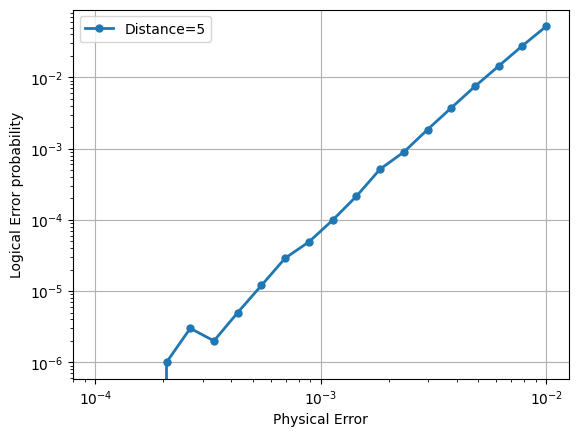

In [6]:
import matplotlib.pyplot as plt

plt.plot(
    physical_error_params,
    logical_errors,
    linewidth=2,
    marker=".",
    markersize=10,
    label=f"Distance={5}",
)
plt.grid(True)
plt.legend()
plt.xscale("log")
plt.xlabel("Physical Error")
plt.yscale("log")
plt.ylabel("Logical Error probability")
plt.show()

## But we can do more!

In [23]:
# Here's the full code for generating a threshold plot of dxdxd memory experiments.

from tqdm import tqdm
import numpy as np

from dotg.circuits.quantum_memory import rotated_surface_code
from dotg.decoders import MinimumWeightPerfectMatching
from dotg.noise import DepolarizingNoise

DISTANCES = [3, 5, 7, 9]
PHYSICAL_ERROR_PARAMS = np.logspace(-3, -2, 20)
NUM_SHOTS = 1e5


noiseless_circuits = [rotated_surface_code(distance=d) for d in DISTANCES]
noise_models = [DepolarizingNoise(physical_error=phys) for phys in PHYSICAL_ERROR_PARAMS]


def noisy_circuit(noiseless_circuit, noise_model):
    return noise_model.permute_circuit(noiseless_circuit)


def decoder(distance, physical_error):
    noiseless_circuit = noiseless_circuits[DISTANCES.index(distance)]
    noise_model = noise_models[np.where(PHYSICAL_ERROR_PARAMS == physical_error)[0][0]]
    return MinimumWeightPerfectMatching(
        circuit=noisy_circuit(noiseless_circuit, noise_model)
    )


logical_error_data = {}
for distance in tqdm(DISTANCES):
    logical_error_data[distance] = []
    for physical_error in PHYSICAL_ERROR_PARAMS:
        _decoder = decoder(distance=distance, physical_error=physical_error)

        logical_error_data[distance].append(_decoder.logical_error(NUM_SHOTS))

100%|██████████| 4/4 [00:51<00:00, 12.78s/it]


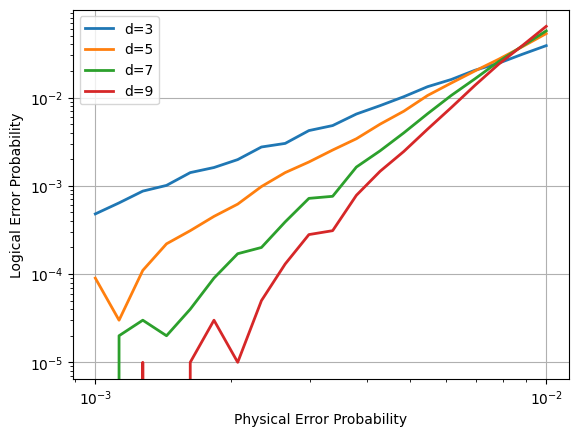

In [24]:
import matplotlib.colors as mpc
import matplotlib.pyplot as plt
colors = mpc.TABLEAU_COLORS

for idx, distance in enumerate(DISTANCES):
    plt.plot(PHYSICAL_ERROR_PARAMS, logical_error_data[distance], linewidth=2, label=f"d={distance}")

plt.ylabel("Logical Error Probability")
plt.xlabel("Physical Error Probability")
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.show()

4 (distances) * 20 (physical errors) * 1e5 (shots) = 8million samples in ~50 seconds on an M2 Macbook Air. The threshold is about 0.7%, what we expect for this noise model.